In [1]:
import pandas as pd
import numpy as np

## 5.8.14

In [63]:
school = np.array([1,2,3,4])
female_students_interviewed = np.array([25, 15, 20, 40])
number_of_smokers = np.array([10,3,6,27])
female_students = np.array([792, 447, 511, 800])

In [64]:
p = number_of_smokers / female_students_interviewed

In [65]:
p_bar = np.sum(female_students * p)/np.sum(female_students)
var_p = (1/np.mean(female_students)**2) * (1/4-1/29) * (1/3) * np.sum(female_students**2 * (p-p_bar)**2) + 1/(4 * 29 * np.mean(female_students)**2) * np.sum((1/female_students_interviewed - 1/female_students)*female_students**2*(p-p_bar)**2 * female_students_interviewed/(female_students_interviewed-1))
se_p = np.sqrt(var_p)
print(p_bar)
print(p_bar - 1.96 * se_p, p_bar + 1.96 * se_p)

0.43117647058823527
0.23957877265361247 0.622774168522858


In [66]:
t_hat = np.sum(29/4 * female_students * p)
var_t = 29**2 * (1/4-1/29) * np.var(number_of_smokers, ddof=1) + 29/4 * np.sum((1/female_students_interviewed - 1/female_students)*(p-p_bar)**2 * female_students_interviewed/(female_students_interviewed-1))
se_t = np.sqrt(var_t)
print(t_hat)
print(t_hat - 1.96 * se_t, t_hat + 1.96 * se_t)

7971.375
7688.402353949749 8254.347646050252


In [76]:
msw = np.sum(p * (1-p) * female_students_interviewed)/(4 * (np.mean(female_students_interviewed)-1))
s_2 = np.sum(number_of_smokers)/np.sum(female_students_interviewed) * (1-np.sum(number_of_smokers)/np.sum(female_students_interviewed))
r_a_2 = 1 - msw/s_2
print(r_a_2)

0.10363828502415473


In [75]:
m_opt = np.ceil(np.sqrt(75 * (1-r_a_2)/r_a_2))  # 26
n_opt = 300/(50+2/3*m_opt)  # 4

## 5.8.19

In [77]:
schools = pd.read_csv('./data/schools.csv')

In [91]:
t = schools[schools['readlevel']==2][['schoolid', 'readlevel']]
t_i = t.groupby('schoolid').count().values
Mi = schools.Mi.groupby(schools.schoolid).mean().values
t_hat = np.sum(75/10*Mi/20 * t_i)

In [92]:
st = 1/9 * np.sum((t_i - t_hat/75)**2)
v_wr = 75**2 * st / 10
se = np.sqrt(v_wr)
print(t_hat)
print(t_hat - 1.96 * se, t_hat + 1.96 * se)

90680.625
31950.15871732329 149411.0912826767


## 5.8.22

In [14]:
agsrs = pd.read_csv('./data/agsrs.csv')

In [93]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('acres92 ~ C(state)', data=agsrs).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
ssw = anova_table['sum_sq']['Residual']
ssb = anova_table['sum_sq']['C(state)']
ssto = ssw + ssb
msw = ssw / anova_table['df']['Residual']
msb = ssb / anova_table['df']['C(state)']
msto = ssto / (anova_table['df']['Residual'] + anova_table['df']['C(state)'])
print(msw, msb, msto)
print(ssw, ssb, ssto)
print(anova_table['df'])

59910564633.05428 488760018795.4477 118716008180.40588
15456925675328.006 20039160770613.355 35496086445941.36
C(state)     41.0
Residual    258.0
Name: df, dtype: float64


In [94]:
r_a_2 = 1 - msw/msto
print(r_a_2)

0.4953455262578266


In [95]:
m_opt = np.sqrt(15 * (1-r_a_2)/r_a_2)
print(m_opt)

3.9092061275213994


## 5.8.24

In [22]:
ozone = pd.read_csv('./data/ozone.csv')

In [23]:
ozone_total_data = ozone[["hr0", "hr1", "hr2", "hr3", "hr4", "hr5", "hr6", "hr7", "hr8", "hr9", "hr10", "hr11", "hr12", "hr13", "hr14", "hr15", "hr16", "hr17", "hr18", "hr19", "hr20", "hr21", "hr22", "hr23"]].values.flatten()

In [33]:
ozone_total_data = ozone_total_data[~np.isnan(ozone_total_data)]
ozone_total_data = ozone_total_data[ozone_total_data >= 0]

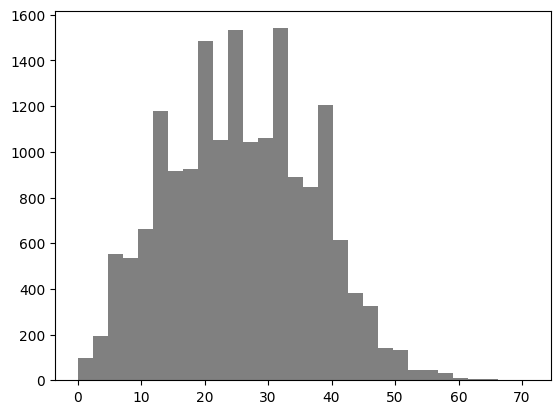

In [144]:
import matplotlib.pyplot as plt
plt.hist(ozone_total_data, bins=30, color='gray')
plt.savefig("./figure/5.8.24a.pdf")

In [37]:
print(np.mean(ozone_total_data))
print(np.std(ozone_total_data))
print(np.median(ozone_total_data))

25.781901489117985
11.372726868704715
26.0


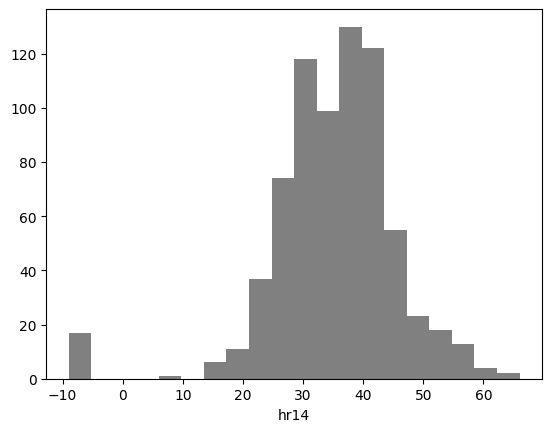

In [145]:
h = 14
plt.hist(ozone["hr"+str(h)], bins=20, color='gray')
plt.xlabel("hr"+str(h))
plt.savefig("./figure/5.8.24b.pdf")

In [97]:
srs = ozone["hr"+str(h)]
print(np.mean(srs))
print(np.std(srs, ddof=1))
print(np.median(srs))
var = (1/srs.shape[0] - 1/(srs.shape[0] * 24)) * np.var(srs, ddof=1)
se = np.sqrt(var)
print(np.mean(srs) - 1.96 * se, np.mean(srs) + 1.96 * se)

34.964383561643835
10.728286136154654
36.0
34.20250932715018 35.72625779613749


In [137]:
def sample(h, start, interval=4):
    all = ozone["hr"+str(h)]
    target = all[start::interval]
    if target.shape[0] == 182:
        target = np.append(target, np.mean(target))
    return target

# h_select = np.random.randint(0, 95, 4)
# print(h_select)  # [92 61 15 86]

h_select = np.array([92, 61, 15, 86])
h_24, h_start = np.divmod(h_select, 4)

# for i in range(3):
#     h_sample.append(np.array(sample(h_24[i], h_start[i])))
h_sample = np.array([sample(h_24[i], h_start[i]) for i in range(4)])

In [139]:
N = 96
n = 4
M = 183
t_hat = N/n * np.sum(h_sample)
y_bar = 1/(n*M) * np.sum(h_sample)
s_2 = 1/(n-1) * np.sum((np.sum(h_sample, axis=1) - t_hat/N)**2)
se = 1/M * np.sqrt((1-n/N)*s_2/n)
print(y_bar)
print(y_bar - 1.96 * se, y_bar + 1.96 * se)

24.494513000660543
17.108133344524255 31.88089265679683
